# Movie Recommendation System
In this jupyter notebook, I aim to create a recommendation system that gives users a set of recommeded movies based on the input movie given.

In [5]:
# Import the required libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Get the ratings data from data/dataset.csv into a pandas dataframe
column_names = ["user_id", "item_id", "rating", "timestamp"]
df = pd.read_csv('data/dataset.csv', sep = '\t', names = column_names)
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [7]:
# Get the movie titles from movie titles csv file
movie_titles = pd.read_csv('data/MovieIdTitles.csv')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [8]:
# Merge the movie titles dataframe with ratings dataframe
df = pd.merge(left = df, right = movie_titles, on = 'item_id', copy = False)
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


## Do some exploratory work

In [9]:
# Calculating the average rating for each movie title sorted in descending order

df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Aiqing wansui (1994)                                 5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Santa with Muscles (1996)                            5.0
Prefontaine (1997)                                   5.0
They Made Me a Criminal (1939)                       5.0
Name: rating, dtype: float64

In [10]:
# Calculating the number of rating for each movie title sorted in descending order

df.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [11]:
# Create a dataframe containing the movie title and its average rating

ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [12]:
# Add a column in ratings conataining the number of rating associated/available for the specific movie title

ratings = ratings.assign(num_of_rating = df.groupby('title')['rating'].count())
ratings.head()

,rating,num_of_rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


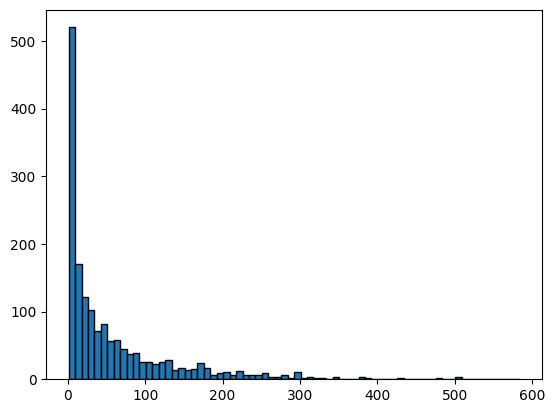

In [13]:
# Plot a histogram showing the num_of_rating
fig = plt.hist(ratings.num_of_rating, bins = 70, edgecolor = 'black')

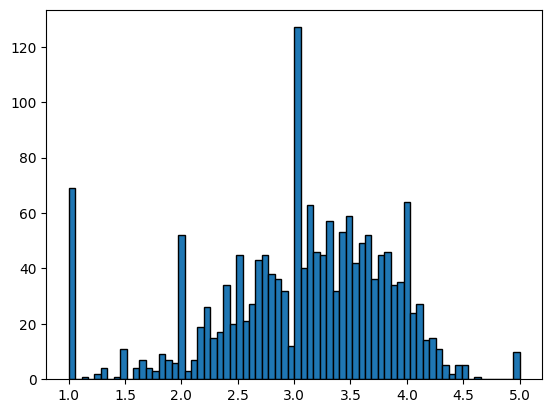

In [14]:
# Plot a histogram of rating in ratings df
fig2 = plt.hist(ratings.rating, bins = 70, edgecolor = 'black')

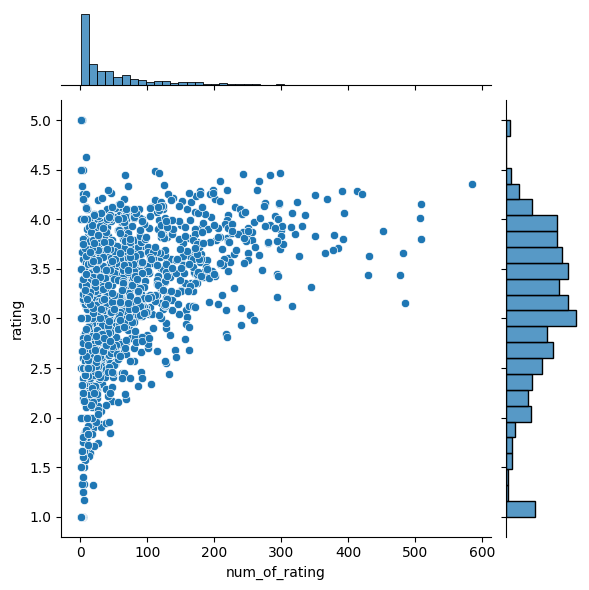

In [15]:
# Create a joint plot of movie rating and num_of_rating using seaborn's jointplot
sns.jointplot(data = ratings, x = ratings.num_of_rating, y = ratings.rating)

 Create the Recommendation System
 Create a matrix that has the user ids on one axis and the movie title on the another axis. 
 Each cell will then consist of the rating the user gave to that movie. 
 Note there will be a lot of NaN values, because most people have not watched most of the movies.

In [16]:
rating_matrix = df.pivot_table(index='user_id', columns='title', values='rating')
rating_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Most rated movies with their average rating
ratings.sort_values(by = 'num_of_rating', ascending = False).head(10)

,rating,num_of_rating
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


 Now we will create a correlation matrix of every movie with every other movie on user ratings. 
 We will then use that correlation matrix to find top matches that relates the best for a particular movie (having atleast 100 ratings) and 
 the result obtained (recommended movies) will then be added to the ratings dataframe of every movie. Those whose matches could not be obtained 
 using correlation, their value will be converted to "-".

In [22]:
# Create the correlation matrix first
movie_corr_matrix = rating_matrix.corr(method = 'pearson')
movie_corr_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),1.0,NaN,-1.000000,-0.500000,-0.500000,0.522233,NaN,-0.426401,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,1.0,NaN,NaN,NaN,NaN,NaN,-0.981981,NaN,NaN,...,NaN,NaN,NaN,-0.944911,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),-1.0,NaN,1.000000,-0.049890,0.269191,0.048973,0.266928,-0.043407,NaN,0.111111,...,NaN,-1.000000,NaN,0.158840,0.119234,0.680414,-4.875600e-17,0.707107,NaN,NaN
12 Angry Men (1957),-0.5,NaN,-0.049890,1.000000,0.666667,0.256625,0.274772,0.178848,NaN,0.457176,...,NaN,NaN,NaN,0.096546,0.068944,-0.361961,1.443376e-01,1.000000,1.0,NaN
187 (1997),-0.5,NaN,0.269191,0.666667,1.000000,0.596644,NaN,-0.554700,NaN,1.000000,...,NaN,0.866025,NaN,0.455233,-0.500000,0.500000,4.753271e-01,NaN,NaN,NaN


In [32]:
# Calculate the number of ratings for each movie
movie_ratings_count = df.groupby('title')['rating'].count()

# Filter the correlation matrix
movies_with_30_ratings = movie_ratings_count[movie_ratings_count >= 30].index
filtered_corr_matrix = movie_corr_matrix.loc[movies_with_30_ratings, movies_with_30_ratings]
filtered_corr_matrix.head()


title,101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),"39 Steps, The (1935)",8 1/2 (1963),Absolute Power (1997),"Abyss, The (1989)",...,Winnie the Pooh and the Blustery Day (1968),With Honors (1994),"Wizard of Oz, The (1939)",Wolf (1994),"Wrong Trousers, The (1993)",Wyatt Earp (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)"
title,,,,,,,,,,,,,,,,,,,,,
101 Dalmatians (1996),1.000000,-0.049890,0.269191,0.048973,0.266928,-0.043407,1.111111e-01,0.522233,0.398783,0.236350,...,-0.101371,0.714832,0.366592,0.219445,-0.002382,0.042025,0.158840,0.119234,0.680414,-4.875600e-17
12 Angry Men (1957),-0.049890,1.000000,0.666667,0.256625,0.274772,0.178848,4.571764e-01,0.635698,-0.163455,0.045374,...,0.284898,-0.116568,0.165508,0.297699,0.330186,0.179640,0.096546,0.068944,-0.361961,1.443376e-01
187 (1997),0.269191,0.666667,1.000000,0.596644,NaN,-0.554700,1.000000e+00,-1.000000,0.188237,0.301511,...,0.870388,NaN,0.741480,0.783349,-1.000000,1.000000,0.455233,-0.500000,0.500000,4.753271e-01
2 Days in the Valley (1996),0.048973,0.256625,0.596644,1.000000,0.240966,0.332724,1.876619e-16,0.866025,-0.038838,0.174608,...,0.512989,0.723747,0.159602,0.043253,-0.126357,0.686864,0.064559,0.156220,0.132017,2.049262e-01
"20,000 Leagues Under the Sea (1954)",0.266928,0.274772,NaN,0.240966,1.000000,0.259308,-3.812716e-02,0.557086,0.162583,0.426051,...,-0.108756,0.252758,0.452486,0.422577,0.548083,0.096976,-0.096465,-0.010894,-0.518476,6.237951e-01


In [59]:
def get_top_matches(movie_title, num_matches=5):
    # Get the correlations for the specific movie
    movie_corr = filtered_corr_matrix[movie_title]
    
    # Sort the correlations and get the top matches
    top_matches = movie_corr.sort_values(ascending=False).head(num_matches + 1) # +1 to exclude the movie itself
    return top_matches.index[1:]  # Exclude the movie itself

# Example: Get top 5 matches for a specific movie
top_matches = get_top_matches('Toy Story (1995)', num_matches=5)
print(top_matches)


Index(['Transformers: The Movie, The (1986)', 'Mouse Hunt (1997)',
       'Farewell My Concubine (1993)', 'Fallen (1998)', '187 (1997)'],
      dtype='object', name='title')
